In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def rmsd_bar_plot_grouped(df_all, df_seen, df_unseen, annot=True, save_path=None):
    def summarize(df, label):
        results = []
        for model in df["Models"].unique():
            for round_name in df["Round"].unique():
                rmsd_data = df[(df['Models'] == model) & (df['Round'] == round_name)]['rmsd']
                if len(rmsd_data) > 0:
                    prop = np.mean(rmsd_data <= 2)
                    results.append({
                        'Model': model,
                        'Round': round_name,
                        'Proportion': prop,
                        'Dataset': label
                    })
        df_prop = pd.DataFrame(results)
        df_summary = df_prop.groupby('Model')['Proportion'].agg(['mean', 'std']).reset_index()
        df_summary.columns = ['Model', 'Mean', 'Std']
        df_summary['Dataset'] = label
        return df_summary

    df_all_summary = summarize(df_all, 'All')
    df_seen_summary = summarize(df_seen, 'Seen')
    df_unseen_summary = summarize(df_unseen, 'Unseen')

    df_summary = pd.concat([df_all_summary, df_seen_summary, df_unseen_summary])

    order = df_all_summary.sort_values('Mean', ascending=False)['Model']
    df_summary_sorted = pd.concat([
        df_summary[df_summary['Dataset'] == ds].set_index('Model').loc[order].reset_index()
        for ds in ['All', 'Seen', 'Unseen']
    ])
    palette = {
        "All": "#5E69E5",   
        "Seen": "#2C9AD4", 
        "Unseen": "#41C7C7" 
    }

    plt.figure(figsize=(8, 6), dpi=300)
    sns.set_style('ticks')

    ax = sns.barplot(
        data=df_summary,
        x='Mean',
        y='Model',
        hue='Dataset',
        order=order,
        palette=palette,
        capsize=0.1,
    )
    for bar, (_, row) in zip(ax.patches, df_summary_sorted.iterrows()):
        x = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        mean, std = row['Mean'], row['Std']

        ax.plot([x, x + std], [y, y], color='black', linewidth=1)
        ax.plot([x + std, x + std], [y - 0.1*bar.get_height(), y + 0.1*bar.get_height()],
                color='black', linewidth=1)
        if annot:
            ax.text(x + std + 0.01, y,
                    f"{mean:.3f}±{std:.3f}",
                    va='center', ha='left', fontsize=8)

    plt.xlabel('Proportion (RMSD ≤ 2Å)', fontsize=14)
    plt.ylabel('')
    plt.xlim(0, 0.35)
    # plt.legend(title='')
    plt.legend(loc='lower right')
    plt.tight_layout()

    if save_path:
        plt.savefig(
            save_path,
            format='svg',
            bbox_inches='tight',
        )


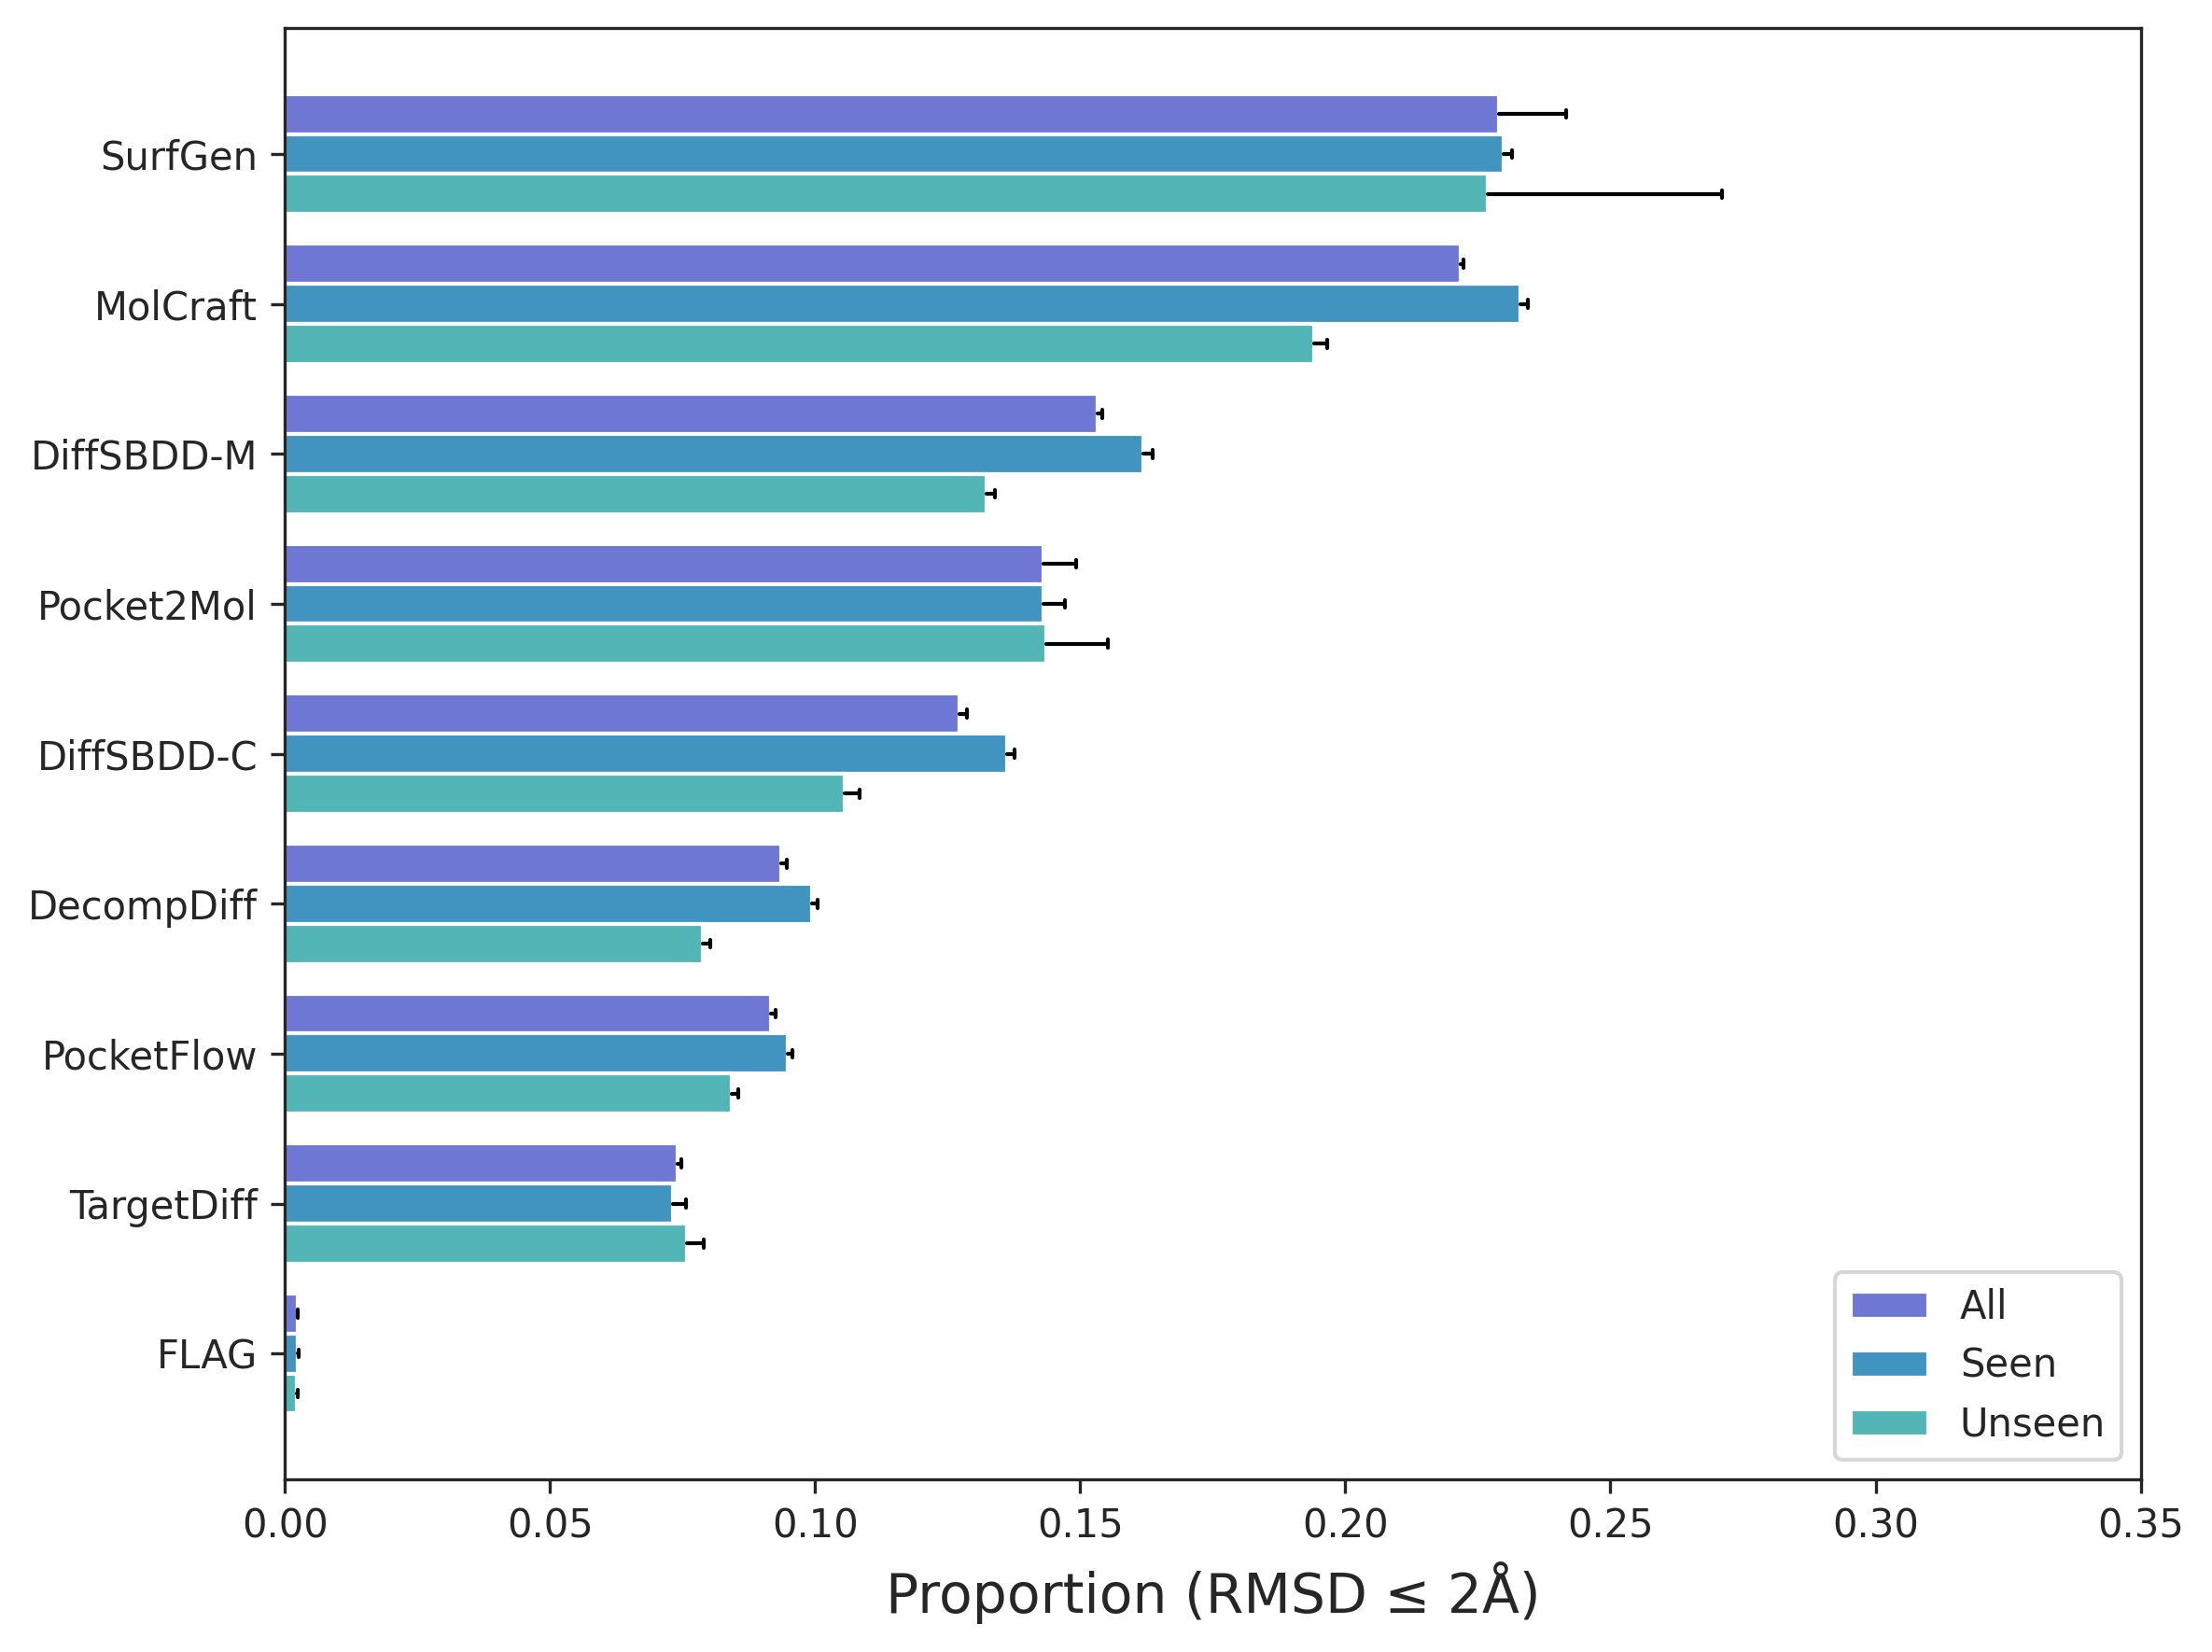

In [ ]:
import pandas as pd

df_all = pd.read_csv("./final_plot/RMSD/Denovo/rmsd_vina_RotatableBond15_all.csv")
df_seen = pd.read_csv("./final_plot/RMSD/Denovo/rmsd_vina_RotatableBond15_seen.csv")
df_unseen = pd.read_csv("./final_plot/RMSD/Denovo/rmsd_vina_RotatableBond15_unseen.csv")

model_name_map = {
    "MolCraft": "MolCraft",
    "DecompDiff": "DecompDiff",
    "FLAG": "FLAG",
    "PocketFlow": "PocketFlow",
    "SurfGen": "SurfGen",
    "TargetDiff": "TargetDiff",
    "Pocket2Mol": "Pocket2Mol",
    "diffSBDD(CrossDock)": "DiffSBDD-C",
    "diffSBDD(MOAD)": "DiffSBDD-M",
}

df_all["Models"] = df_all["Models"].map(model_name_map)
df_seen["Models"] = df_seen["Models"].map(model_name_map)
df_unseen["Models"] = df_unseen["Models"].map(model_name_map)
# rmsd_bar_plot_grouped(df_all, df_seen, df_unseen, save_path="./final_plot/output/05-rmsd_bar_denovo_RotatableBond15_vina_grouped.svg")
rmsd_bar_plot_grouped(df_all, df_seen, df_unseen, annot=False, save_path="./final_plot/output/05-rmsd_bar_denovo_RotatableBond15_vina_grouped_NoNumber.svg")
